In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load dataset
file_path = "sales_data_sample.csv"
df = pd.read_csv(file_path, encoding="latin1")

Simpan dataset sebelum preprocessing untuk perbandingan

In [58]:
df_original = df.copy()

Menampilkan lima baris pertama sebelum preprocessing

In [59]:
print("Dataset sebelum preprocessing:")
print(df_original.head())

Dataset sebelum preprocessing:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             5

Menampilkan jumlah missing values pada setiap kolom

Cek jumlah missing values sebelum preprocessing

In [60]:
missing_before = df.isnull().sum()
print("\nJumlah missing values sebelum preprocessing:\n", missing_before)


Jumlah missing values sebelum preprocessing:
 ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


Menghapus kolom ADDRESSLINE2 karena terlalu banyak missing values

In [61]:
df_no_missing = df.drop(columns=['ADDRESSLINE2'])

Mengisi missing values pada kolom STATE, POSTALCODE, dan TERRITORY dengan modus

In [62]:
for col in ['STATE', 'POSTALCODE', 'TERRITORY']:
    df_no_missing[col] = df_no_missing[col].fillna(df_no_missing[col].mode()[0])

Cek jumlah missing values setelah penanganan

In [63]:
missing_after = df_no_missing.isnull().sum()
print("\nJumlah missing values setelah preprocessing:\n", missing_after)


Jumlah missing values setelah preprocessing:
 ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64


Menghapus data duplikat

In [66]:
df_no_duplicates = df_no_missing.drop_duplicates()

Perbandingan jumlah data sebelum dan sesudah menghapus duplikasi

In [67]:
print("\nJumlah data sebelum menghapus duplikasi:", df_no_missing.shape[0])
print("Jumlah data setelah menghapus duplikasi:", df_no_duplicates.shape[0])


Jumlah data sebelum menghapus duplikasi: 2823
Jumlah data setelah menghapus duplikasi: 2823


Normalisasi Data menggunakan MinMaxScaler

In [73]:
scaler = MinMaxScaler()
df_normalized = df_no_duplicates.copy()

numeric_cols = ['QUANTITYORDERED', 'PRICEEACH', 'SALES']
df_normalized[numeric_cols] = scaler.fit_transform(df_no_duplicates[numeric_cols])

Statistik deskriptif sebelum dan sesudah normalisasi

In [74]:
print("\nStatistik deskriptif sebelum normalisasi:\n", df_no_duplicates[numeric_cols].describe())
print("\nStatistik deskriptif setelah normalisasi:\n", df_normalized[numeric_cols].describe())


Statistik deskriptif sebelum normalisasi:
        QUANTITYORDERED    PRICEEACH         SALES
count      2823.000000  2823.000000   2823.000000
mean         35.092809    83.658544   3553.889072
std           9.741443    20.174277   1841.865106
min           6.000000    26.880000    482.130000
25%          27.000000    68.860000   2203.430000
50%          35.000000    95.700000   3184.800000
75%          43.000000   100.000000   4508.000000
max          97.000000   100.000000  14082.800000

Statistik deskriptif setelah normalisasi:
        QUANTITYORDERED    PRICEEACH        SALES
count      2823.000000  2823.000000  2823.000000
mean          0.319701     0.776512     0.225854
std           0.107049     0.275906     0.135425
min           0.000000     0.000000     0.000000
25%           0.230769     0.574125     0.126560
50%           0.318681     0.941193     0.198716
75%           0.406593     1.000000     0.296005
max           1.000000     1.000000     1.000000


Memastikan format tanggal seragam

In [75]:
df_normalized['ORDERDATE'] = pd.to_datetime(df_normalized['ORDERDATE'], format='%m/%d/%Y %H:%M', errors='coerce')

Menampilkan jumlah data dengan tanggal tidak valid

In [76]:
print("\nJumlah data dengan tanggal tidak valid setelah konversi:", df_normalized['ORDERDATE'].isna().sum())


Jumlah data dengan tanggal tidak valid setelah konversi: 0


Memastikan nilai kategori seragam

In [77]:
df_normalized['STATUS'] = df_normalized['STATUS'].str.upper()

Deteksi Outlier dengan Boxplot

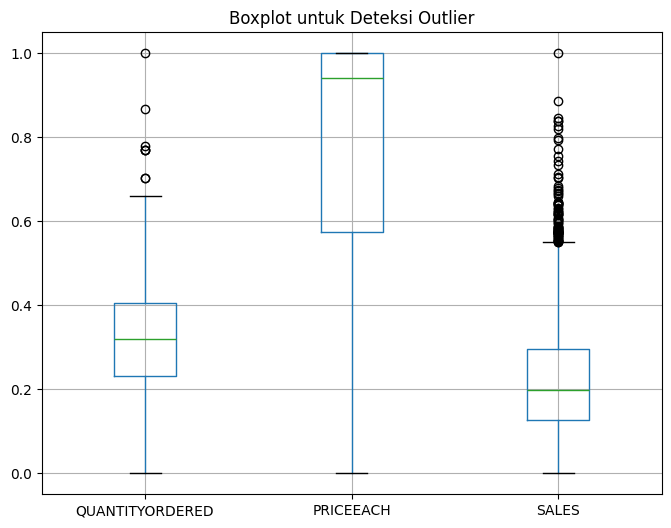

In [78]:
plt.figure(figsize=(8, 6))
df_normalized[numeric_cols].boxplot()
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()

Menghapus outlier dengan IQR

In [79]:
Q1 = df_normalized[numeric_cols].quantile(0.25)
Q3 = df_normalized[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df_normalized[~((df_normalized[numeric_cols] < lower_bound) | (df_normalized[numeric_cols] > upper_bound)).any(axis=1)]


Perbandingan jumlah data sebelum dan sesudah menghapus outlier

In [80]:
print("\nJumlah data sebelum menghapus outlier:", df_normalized.shape[0])
print("Jumlah data setelah menghapus outlier:", df_no_outliers.shape[0])


Jumlah data sebelum menghapus outlier: 2823
Jumlah data setelah menghapus outlier: 2739


Statistik setelah preprocessing selesai

In [81]:
print("\nStatistik setelah preprocessing:\n", df_no_outliers.describe())


Statistik setelah preprocessing:
         ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2739.000000      2739.000000  2739.000000      2739.000000   
mean   10257.908361         0.314709     0.769815         6.495801   
min    10100.000000         0.000000     0.000000         1.000000   
25%    10179.000000         0.230769     0.562705         3.000000   
50%    10262.000000         0.307692     0.919858         6.000000   
75%    10332.000000         0.395604     1.000000         9.000000   
max    10425.000000         0.659341     1.000000        18.000000   
std       91.586591         0.102347     0.277371         4.233277   

             SALES                      ORDERDATE       QTR_ID     MONTH_ID  \
count  2739.000000                           2739  2739.000000  2739.000000   
mean      0.213338  2004-05-09 01:25:41.730558720     2.722892     7.111720   
min       0.000000            2003-01-06 00:00:00     1.000000     1.000000   
25%       0.124367

Menampilkan informasi dataset setelah preprocessing

In [82]:
print("\nInformasi dataset setelah preprocessing:")
print(df_no_outliers.info())


Informasi dataset setelah preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 2739 entries, 0 to 2822
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2739 non-null   int64         
 1   QUANTITYORDERED   2739 non-null   float64       
 2   PRICEEACH         2739 non-null   float64       
 3   ORDERLINENUMBER   2739 non-null   int64         
 4   SALES             2739 non-null   float64       
 5   ORDERDATE         2739 non-null   datetime64[ns]
 6   STATUS            2739 non-null   object        
 7   QTR_ID            2739 non-null   int64         
 8   MONTH_ID          2739 non-null   int64         
 9   YEAR_ID           2739 non-null   int64         
 10  PRODUCTLINE       2739 non-null   object        
 11  MSRP              2739 non-null   int64         
 12  PRODUCTCODE       2739 non-null   object        
 13  CUSTOMERNAME      2739 non-null   object 

Visualisasi distribusi data setelah preprocessing

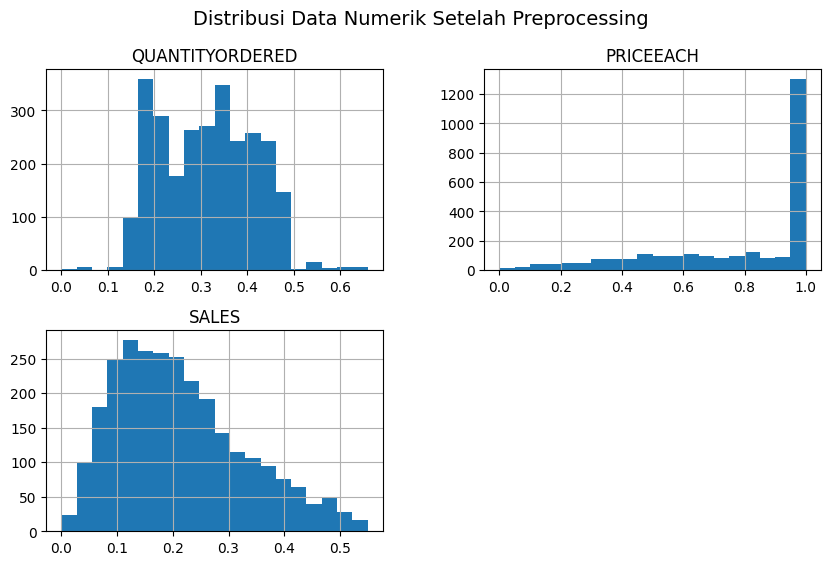

In [83]:
df_no_outliers[numeric_cols].hist(figsize=(10, 6), bins=20)
plt.suptitle("Distribusi Data Numerik Setelah Preprocessing", fontsize=14)
plt.show()

Korelasi antar variabel numerik setelah preprocessing

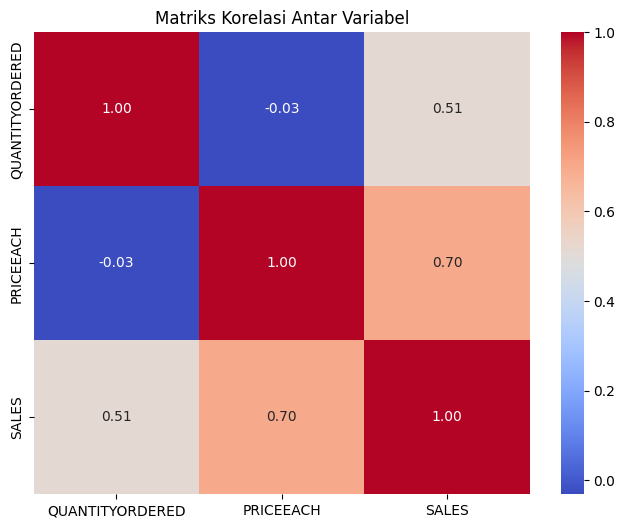

In [84]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_no_outliers[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Antar Variabel")
plt.show()

Visualisasi tren penjualan berdasarkan tanggal

C:\Users\Faliq\AppData\Local\Temp\ipykernel_25204\370616372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['ORDERDATE'] = pd.to_datetime(df_no_outliers['ORDERDATE'])


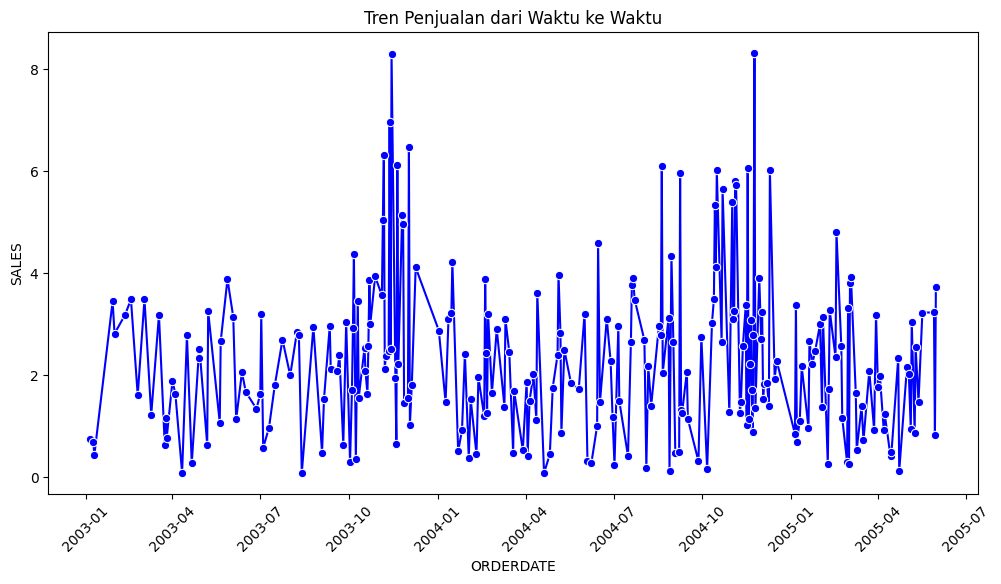

In [85]:
df_no_outliers['ORDERDATE'] = pd.to_datetime(df_no_outliers['ORDERDATE'])
df_trend = df_no_outliers.groupby('ORDERDATE')['SALES'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='ORDERDATE', y='SALES', data=df_trend, marker="o", color="b")
plt.title("Tren Penjualan dari Waktu ke Waktu")
plt.xticks(rotation=45)
plt.show()

Visualisasi distribusi status pesanan

C:\Users\Faliq\AppData\Local\Temp\ipykernel_25204\845004404.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_no_outliers, x='STATUS', order=df_no_outliers['STATUS'].value_counts().index, palette="viridis")


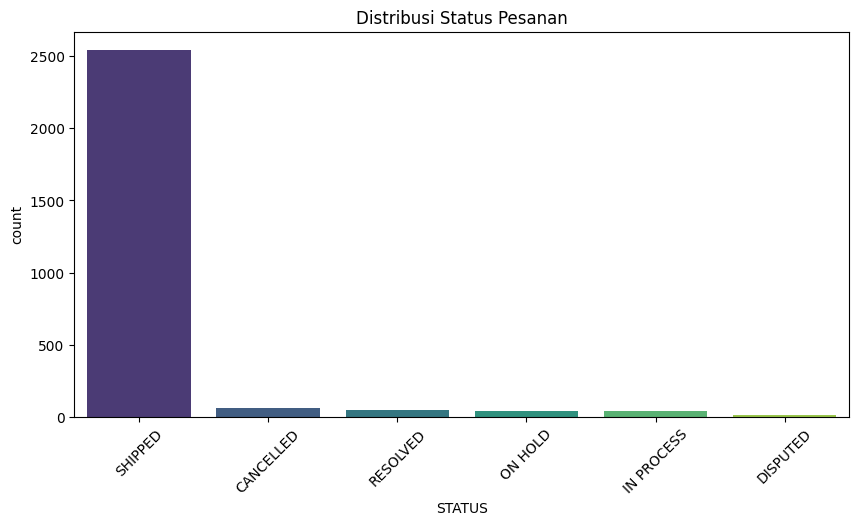

In [86]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_no_outliers, x='STATUS', order=df_no_outliers['STATUS'].value_counts().index, palette="viridis")
plt.title("Distribusi Status Pesanan")
plt.xticks(rotation=45)
plt.show()

Menyimpan hasil preprocessing untuk analisis lebih lanjut

In [87]:
df_no_outliers.to_csv("sales_data_cleaned.csv", index=False)

print("\nPreprocessing selesai! Data yang telah dibersihkan disimpan sebagai 'sales_data_cleaned.csv'.")


Preprocessing selesai! Data yang telah dibersihkan disimpan sebagai 'sales_data_cleaned.csv'.
